In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


ROIS:  [[682 199 113 281]]


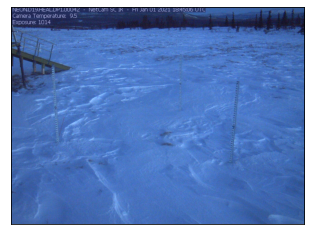

In [16]:
# identifying ROIs

#img = cv2.imread("snow_test.jpg", 1)
img = cv2.imread("more_snow_test.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# attain the ROIs points in array form --> see output
# press 'enter' to save ROIs
ROIs = cv2.selectROIs("Select Rois", img)
print("ROIS: " , ROIs)

# esc , then exit
cv2.waitKey(0)

# matplotlib
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()


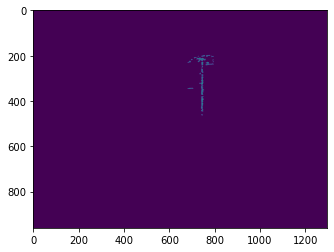

1


In [17]:
# copy array
test = img.copy()

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

img_crop = []

#loop over every bounding box save in array "ROIs"
# Bounding Box has 4 contours
for rect in ROIs:
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    
    region_of_interest_vertices = [(x1, y1), (x1, y1 + y2), (x1 + x2, y1 + y2), (x1 +x2, y1)]
        
    #crop roi from original image
    gray_image = cv2.cvtColor(test, 0)
    canny_image = cv2.Canny(gray_image, 100, 200)

    cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32),)
    
    
    plt.imshow(cropped_image)
    plt.show()
    
    img_crop.append(cropped_image)
    

    
print(len(img_crop))


In [11]:
'''
# LSD -- in progress

hold = []
print(len(img_crop))
fld = cv2.ximgproc.createFastLineDetector()
for i in range(len(img_crop)):

    
    lines = fld.detect(img_crop[i])
    
    hold.append(lines)
    
print(len(hold))   
'''

'\n# LSD -- in progress\n\nhold = []\nprint(len(img_crop))\nfld = cv2.ximgproc.createFastLineDetector()\nfor i in range(len(img_crop)):\n\n    \n    lines = fld.detect(img_crop[i])\n    \n    hold.append(lines)\n    \nprint(len(hold))   \n'

In [13]:
'''
# LSD -- in progress

drawn_img = fld.drawSegments(img, hold[0])


#Show image
cv2.imshow("LSD",drawn_img )
cv2.waitKey(0)
'''

27

In [12]:
# PROB HOUGH

hold = []
print(len(img_crop))

for i in range(len(img_crop)):

    lines = cv2.HoughLinesP(img_crop[i],
                            rho=6,
                            theta=np.pi/180,
                            threshold=160,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=25)
    
    hold.append(lines)
    

1


In [14]:
# PROB HOUGH

def draw(img, line0, line1, line2):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in line0:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)
    for line in line1:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)
    for line in line2:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)            

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)            
    return img
            
if hold is None:
    image_with_lines = test
else:    
    image_with_lines = draw(test, hold[0], hold[1], hold[2])    
    
plt.imshow(image_with_lines)
plt.show()

IndexError: list index out of range